In [ ]:
#Installation for Google colab in particular
!pip install d2l

In [ ]:
import pandas as pd
import numpy as np
from numpy import zeros, newaxis

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from d2l import torch as d2l

from sklearn.preprocessing import MinMaxScaler
import math, time
from math import sqrt
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

import statistics as st
import scipy as sc

In [ ]:
#Loading in data
url = 'halyk_stock_price.csv'
meta = pd.read_csv(url)
meta = meta.dropna(how='any',axis=0) #If there is missing data
meta['Data'].apply(pd.to_datetime) #For ease of adjusting dates later on
len(meta.index)

4671

In [ ]:
print(meta)

            Data   Open   High    Low  Close  Adj Close      Volume
0     2025-06-13  23.15  23.60  23.00  23.35      23.35      31,078
1     2025-06-12  22.70  23.85  22.55  23.05      23.05     132,732
2     2025-06-11  22.60  22.70  22.50  22.60      22.60      77,088
3     2025-06-10  22.60  22.70  22.55  22.60      22.60      93,516
4     2025-06-09  22.60  22.70  22.50  22.55      22.55      63,426
...          ...    ...    ...    ...    ...        ...         ...
4666  2012-09-03  19.95  20.21  19.85  19.98      19.98   1,101,890
4667  2012-09-02  19.70  19.77  19.65  19.74      19.74   3,909,766
4668  2012-09-01  19.90  19.90  19.74  19.75      19.75   2,540,956
4669  2012-08-31  20.95  21.00  19.80  19.80      19.80   3,114,505
4670  2012-08-30  21.00  21.25  19.65  20.90      20.90  29,641,866

[4671 rows x 7 columns]


In [ ]:
meta = meta[['Close'] + [col for col in meta if col not in ['Adj Close', 'Close', 'Data']] + ['Adj Close', 'Data']]

In [ ]:
print(meta)

      Close   Open   High    Low      Volume  Adj Close        Data
0     23.35  23.15  23.60  23.00      31,078      23.35  2025-06-13
1     23.05  22.70  23.85  22.55     132,732      23.05  2025-06-12
2     22.60  22.60  22.70  22.50      77,088      22.60  2025-06-11
3     22.60  22.60  22.70  22.55      93,516      22.60  2025-06-10
4     22.55  22.60  22.70  22.50      63,426      22.55  2025-06-09
...     ...    ...    ...    ...         ...        ...         ...
4666  19.98  19.95  20.21  19.85   1,101,890      19.98  2012-09-03
4667  19.74  19.70  19.77  19.65   3,909,766      19.74  2012-09-02
4668  19.75  19.90  19.90  19.74   2,540,956      19.75  2012-09-01
4669  19.80  20.95  21.00  19.80   3,114,505      19.80  2012-08-31
4670  20.90  21.00  21.25  19.65  29,641,866      20.90  2012-08-30

[4671 rows x 7 columns]


In [ ]:
#Sorting dates
meta = meta.sort_values('Data')
meta.head()

,Close,Open,High,Low,Volume,Adj Close,Data
4670,20.90,21.00,21.25,19.65,"29,641,866",20.90,2012-08-30
4669,19.80,20.95,21.00,19.80,"3,114,505",19.80,2012-08-31
4668,19.75,19.90,19.90,19.74,"2,540,956",19.75,2012-09-01
4667,19.74,19.70,19.77,19.65,"3,909,766",19.74,2012-09-02
4666,19.98,19.95,20.21,19.85,"1,101,890",19.98,2012-09-03


In [ ]:
# Заменяем '-' на '0', затем удаляем запятые и преобразуем в числа
meta['Volume'] = meta['Volume'].replace('-', '0')                      # заменяем дефис
meta['Volume'] = meta['Volume'].str.replace(',', '', regex=False)     # удаляем запятые
meta['Volume'] = pd.to_numeric(meta['Volume'])

In [ ]:
print(meta['Volume'].head())

4670    29641866
4669     3114505
4668     2540956
4667     3909766
4666     1101890
Name: Volume, dtype: int64


In [ ]:
print(max(meta['Open']))
print(max(meta['High']))
print(max(meta['Low']))
print(max(meta['Close']))
print(max(meta['Volume']))

26.9
46.36
26.39
26.4
29641866


In [ ]:
print(min(meta['Open']))
print(min(meta['High']))
print(min(meta['Low']))
print(min(meta['Close']))
print(min(meta['Volume']))

1.65
1.65
1.61
1.63
0


In [ ]:
print(st.mean(meta['Open']))
print(st.mean(meta['High']))
print(st.mean(meta['Low']))
print(st.mean(meta['Close']))
print(st.mean(meta['Volume']))

10.954587882680368
11.119034467994005
10.770710768572041
10.936097195461358
137169.50695782487


In [ ]:
print(np.var(meta['Open']))
print(np.var(meta['High']))
print(np.var(meta['Low']))
print(np.var(meta['Close']))
print(np.var(meta['Volume']))

23.39916313030914
24.170784017437484
22.754771620690995
23.270857964434324
283180058438.85944


In [ ]:
print(sc.stats.skew(meta['Open']))
print(sc.stats.skew(meta['High']))
print(sc.stats.skew(meta['Low']))
print(sc.stats.skew(meta['Close']))
print(sc.stats.skew(meta['Volume']))

0.6781592554880361
0.7492381577504452
0.674139484222782
0.6740152285130359
39.1966790948904


In [ ]:
print(sc.stats.kurtosis(meta['Open']))
print(sc.stats.kurtosis(meta['High']))
print(sc.stats.kurtosis(meta['Low']))
print(sc.stats.kurtosis(meta['Close']))
print(sc.stats.kurtosis(meta['Volume']))

0.032143323515407385
0.5542459164155504
0.023249711496726277
0.022227313913764313
2056.671480161355


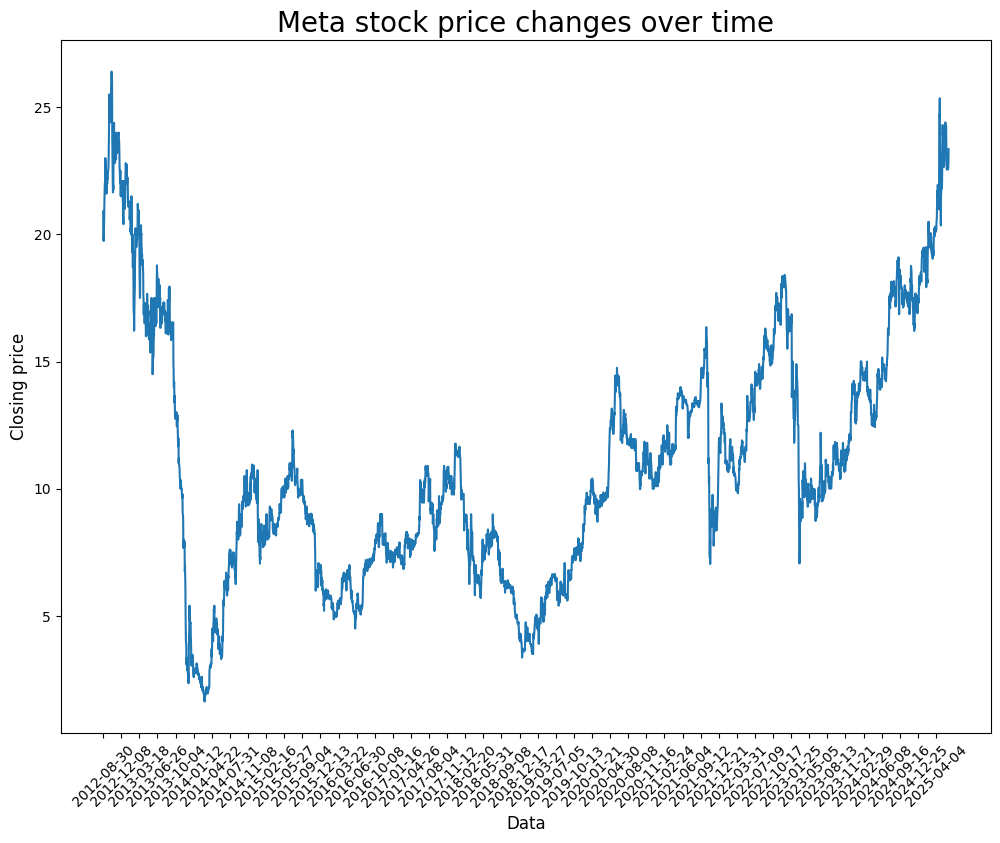

In [ ]:
plt.figure(figsize = (12,9))
plt.plot(meta.Data, meta.Close)
plt.xticks(range(0,meta.shape[0],100),meta['Data'].loc[::100],rotation=45)
plt.xlabel('Data',fontsize=12)
plt.ylabel('Closing price',fontsize=12)
plt.title('Meta stock price changes over time',fontsize=20)
plt.show()

In [ ]:


short_MA = meta_numeric.rolling(window=15).mean()
long_MA = meta_numeric.rolling(window=80).mean()

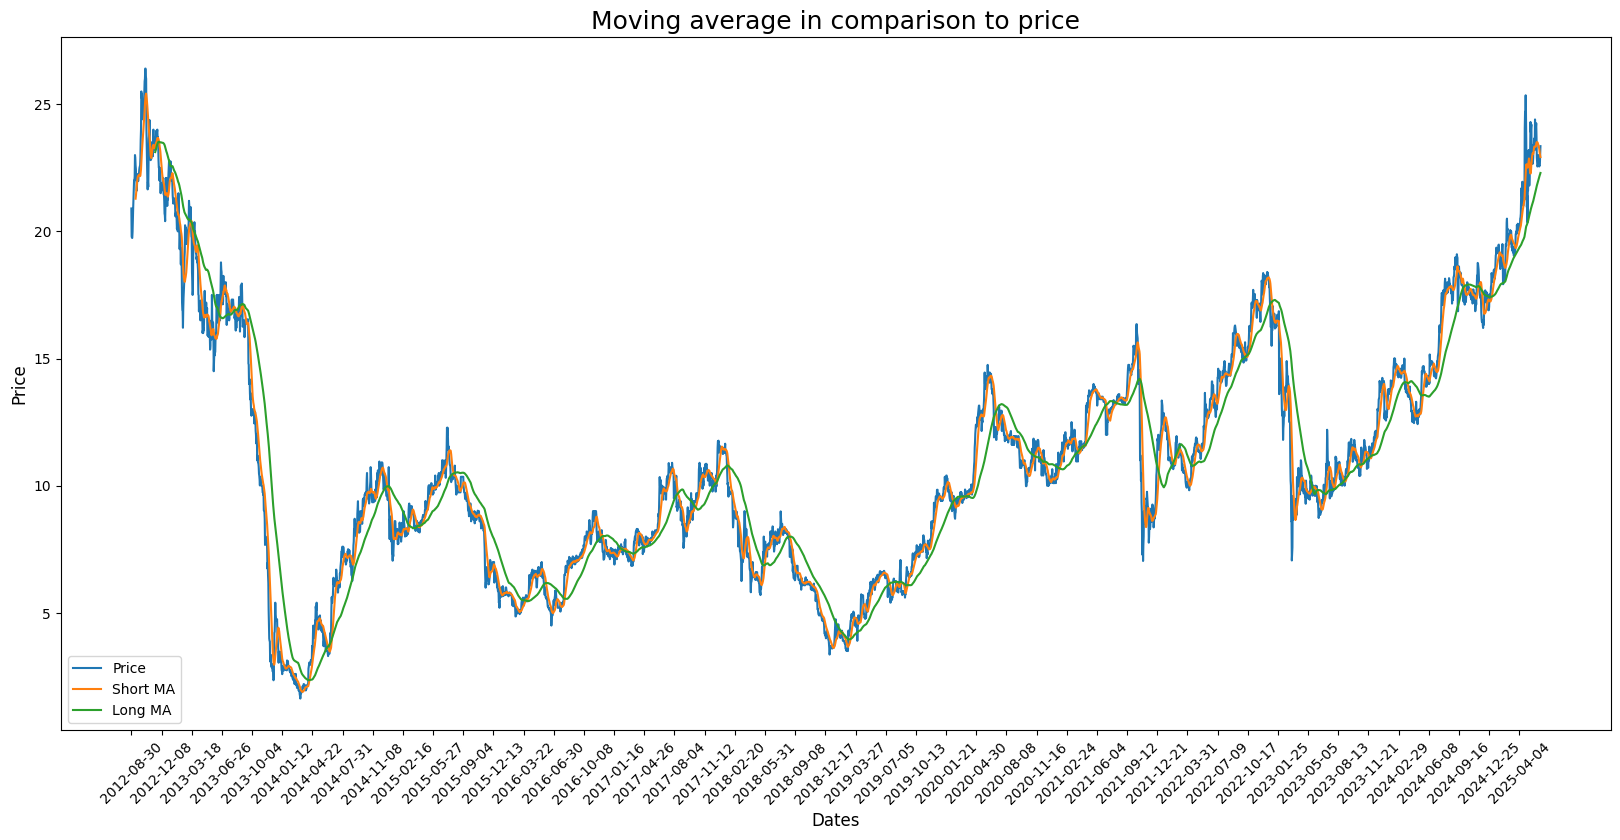

In [ ]:
plt.figure(figsize=(20,9))

plt.xlabel('Dates',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.title('Moving average in comparison to price',fontsize=18)

plt.plot(meta.Data,meta.Close,label='Price')
plt.plot(meta.Data,short_MA.Close, label='Short MA')
plt.plot(meta.Data,long_MA.Close,label='Long MA')

plt.xticks(range(0,meta.shape[0],100),meta.Data.loc[::100],rotation=45)

plt.legend()
plt.show()

In [ ]:
#Preparing inputs
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(meta, test_size = 0.2, random_state = 21)

X_train_array = training_set.iloc[:,1:-2].values
y_train_array = training_set.iloc[:,0:1].values

X_test_array = test_set.iloc[:,1:-2].values
y_test_array = test_set.iloc[:,0:1].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_array = scaler.fit_transform(X_train_array)
X_test_array = scaler.fit_transform(X_test_array)
y_train_array = scaler.fit_transform(y_train_array)
y_test_array = scaler.fit_transform(y_test_array)

In [ ]:
training = torch.tensor(X_train_array, dtype=torch.float32)
test = torch.tensor(X_test_array, dtype=torch.float32)

In [ ]:
trainlabels = torch.tensor(y_train_array, dtype=torch.float32)
testlabels = torch.tensor(y_test_array, dtype=torch.float32)

In [ ]:
#MLP model set up with activation functions
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(num_input, num_hidden)
        nn.init.kaiming_uniform_(self.hidden.weight) #Initialising weights
        self.activation = nn.ReLU()
        self.out = nn.Linear(num_hidden, num_output)

    def forward(self, X):
        X = self.hidden(X)
        X = self.activation(X)
        X = self.out(X)
        return X

In [ ]:
#Model specifics
num_input, num_output, num_hidden = 4, 1, 4
model_1 = MLP(num_input, num_output, num_hidden)

In [ ]:

loss = nn.MSELoss()

In [ ]:
#Training the model
train_hist_mlp1 = np.zeros(100)
net = model_1
optimizer = torch.optim.SGD(net.parameters(), lr = 0.5)
for epoch in range(100):
    optimizer.zero_grad()
    y_predmlp1 = net(training)
    l = loss(y_predmlp1, trainlabels)
    train_hist_mlp1[epoch] = l.item()
    print("Epoch ", epoch, "MSE: ", l)
    l.backward()
    optimizer.step()

Epoch  0 MSE:  tensor(0.3600, grad_fn=<MseLossBackward0>)
Epoch  1 MSE:  tensor(0.1499, grad_fn=<MseLossBackward0>)
Epoch  2 MSE:  tensor(0.0699, grad_fn=<MseLossBackward0>)
Epoch  3 MSE:  tensor(0.0409, grad_fn=<MseLossBackward0>)
Epoch  4 MSE:  tensor(0.0351, grad_fn=<MseLossBackward0>)
Epoch  5 MSE:  tensor(0.0320, grad_fn=<MseLossBackward0>)
Epoch  6 MSE:  tensor(0.0295, grad_fn=<MseLossBackward0>)
Epoch  7 MSE:  tensor(0.0271, grad_fn=<MseLossBackward0>)
Epoch  8 MSE:  tensor(0.0249, grad_fn=<MseLossBackward0>)
Epoch  9 MSE:  tensor(0.0227, grad_fn=<MseLossBackward0>)
Epoch  10 MSE:  tensor(0.0207, grad_fn=<MseLossBackward0>)
Epoch  11 MSE:  tensor(0.0186, grad_fn=<MseLossBackward0>)
Epoch  12 MSE:  tensor(0.0167, grad_fn=<MseLossBackward0>)
Epoch  13 MSE:  tensor(0.0148, grad_fn=<MseLossBackward0>)
Epoch  14 MSE:  tensor(0.0131, grad_fn=<MseLossBackward0>)
Epoch  15 MSE:  tensor(0.0114, grad_fn=<MseLossBackward0>)
Epoch  16 MSE:  tensor(0.0099, grad_fn=<MseLossBackward0>)
Epoch  

In [ ]:
y_pred_test = model_1(test)

In [ ]:
y_train_pred_origmlp = scaler.inverse_transform(y_predmlp1.detach().numpy())
y_train_origmlp = scaler.inverse_transform(trainlabels.detach().numpy())

In [ ]:
y_test_predmlp = scaler.inverse_transform(y_pred_test.detach().numpy())
y_testmlp = scaler.inverse_transform(testlabels.detach().numpy())

In [ ]:
#Preparing inputs
closing = meta[['Close']]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
closing['Close'] = scaler.fit_transform(closing['Close'].values.reshape(-1,1))

<ipython-input-64-3218315939>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing['Close'] = scaler.fit_transform(closing['Close'].values.reshape(-1,1))


In [ ]:
def split_data(data, timeframe):
    numpydata = data.to_numpy()
    data = []

    for index in range(len(numpydata) - timeframe): #Subtracting timeframe because the last few inputs will have NaN values
        data.append(numpydata[index: index + timeframe])

    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]

    return [x_train, y_train, x_test, y_test]
timeframe = 31
x_train, y_train, x_test, y_test = split_data(closing, timeframe)

In [ ]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train= torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [ ]:
x_train.shape

torch.Size([3712, 30, 1])

In [ ]:
x_train = torch.transpose(x_train, 1, 2)
x_train = x_train.reshape(3712, 30)

In [ ]:
x_test.shape

torch.Size([928, 30, 1])

In [ ]:
x_test = torch.transpose(x_test, 1, 2)
x_test = x_test.reshape(928, 30)

In [ ]:
#MLP model set up with activation functions
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(num_input, num_hidden)
        nn.init.kaiming_uniform_(self.hidden.weight)
        self.activation = nn.ReLU()
        self.out = nn.Linear(num_hidden, num_output)

    def forward(self, X):
        X = self.hidden(X)
        if self.training == True:
          X = dropout_layer(X, dropout = 0.2)
        X = self.activation(X)
        X = self.out(X)
        return X

In [ ]:
def dropout_layer(X, dropout):
  assert 0 <= dropout <= 1
  # In this case, all elements are dropped out
  if dropout == 1:
    return torch.zeros_like(X)
    # In this case, all elements are kept
  if dropout == 0:
    return X
  mask = (torch.rand(X.shape) > dropout).float()
  return mask * X / (1.0 - dropout)

In [ ]:
#Model structure
num_input, num_output, num_hidden = 30, 1, 4
model_1 = MLP(num_input, num_output, num_hidden)

In [ ]:
#Training the model
train_hist_mlp2 = np.zeros(100)
net = model_1.train()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.5)
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = net(x_train)
    l = loss(y_pred, y_train)
    train_hist_mlp2[epoch] = l.item()
    print("Epoch ", epoch, "MSE: ", l)
    l.backward()
    optimizer.step()

Epoch  0 MSE:  tensor(0.5381, grad_fn=<MseLossBackward0>)
Epoch  1 MSE:  tensor(0.0772, grad_fn=<MseLossBackward0>)
Epoch  2 MSE:  tensor(0.0358, grad_fn=<MseLossBackward0>)
Epoch  3 MSE:  tensor(0.0316, grad_fn=<MseLossBackward0>)
Epoch  4 MSE:  tensor(0.0316, grad_fn=<MseLossBackward0>)
Epoch  5 MSE:  tensor(0.0316, grad_fn=<MseLossBackward0>)
Epoch  6 MSE:  tensor(0.0316, grad_fn=<MseLossBackward0>)
Epoch  7 MSE:  tensor(0.0316, grad_fn=<MseLossBackward0>)
Epoch  8 MSE:  tensor(0.0316, grad_fn=<MseLossBackward0>)
Epoch  9 MSE:  tensor(0.0316, grad_fn=<MseLossBackward0>)
Epoch  10 MSE:  tensor(0.0316, grad_fn=<MseLossBackward0>)
Epoch  11 MSE:  tensor(0.0316, grad_fn=<MseLossBackward0>)
Epoch  12 MSE:  tensor(0.0316, grad_fn=<MseLossBackward0>)
Epoch  13 MSE:  tensor(0.0316, grad_fn=<MseLossBackward0>)
Epoch  14 MSE:  tensor(0.0316, grad_fn=<MseLossBackward0>)
Epoch  15 MSE:  tensor(0.0316, grad_fn=<MseLossBackward0>)
Epoch  16 MSE:  tensor(0.0316, grad_fn=<MseLossBackward0>)
Epoch  

In [ ]:
y_test_pred = model_1(x_test)

In [ ]:
y_train_pred_origmlp2 = scaler.inverse_transform(y_pred.detach().numpy())
y_train_origmlp2 = scaler.inverse_transform(y_train.detach().numpy())

In [ ]:
y_test_predmlp2 = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test_origmlp2 = scaler.inverse_transform(y_test.detach().numpy())

In [ ]:
closing_price = meta[['Close']]

In [ ]:
window_size = 15 #14 input values and 15th value is the target

In [ ]:
#Function for normalising and splitting data
scaler = MinMaxScaler(feature_range=(-1, 1))

def split_data(prices, window):
    raw = prices.to_numpy()
    data = []
    plotting = []

    #The last 15 indexes will include null values so we subtract the window size
    for index in range(len(raw) - window):
        plotting.append(raw[index][0])
        data.append(raw[index: index + window])

    plotting = pd.DataFrame(plotting)
    data = np.array(data)
    test_set_size = int(np.round(0.2 * data.shape[0]))
    train_set_size = data.shape[0] - (test_set_size)

    X_train = data[:train_set_size,:-1,]
    X_train = scaler.fit_transform(X_train.reshape(-1,1))
    X_train = X_train.reshape(train_set_size, window - 1, 1)
    y_train = data[:train_set_size,-1,:]
    y_train = scaler.fit_transform(y_train)

    X_test = data[:test_set_size,:-1,]
    X_test = scaler.fit_transform(X_test.reshape(-1,1))
    X_test = X_test.reshape(test_set_size, window - 1, 1)
    y_test = data[:test_set_size,-1,]
    y_test = scaler.fit_transform(y_test)

    return [X_train, y_train, X_test, y_test, train_set_size, test_set_size]

In [ ]:

#Preparing inputs
X_train, y_train, X_test, y_test, train_size, test_size = split_data(closing_price, window_size)

In [ ]:
#Converting data to tensors for the model
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train_rnn = torch.from_numpy(y_train).type(torch.Tensor)
y_test_rnn = torch.from_numpy(y_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)

In [ ]:
X_train.shape

torch.Size([3725, 14, 1])

In [ ]:
X_test.shape

torch.Size([931, 14, 1])

In [ ]:
y_train_rnn.shape

torch.Size([3725, 1])

In [ ]:
y_test_rnn.shape

torch.Size([931, 1])

In [ ]:
#RNN model
class RNN(nn.Module):
    def __init__(self, num_inputs, num_hiddens, num_layers, num_outputs):
        super(RNN, self).__init__()
        self.num_hiddens = num_hiddens #Number of neurons in the hidden layer
        self.num_layers = num_layers #Number of hidden layers
        self.rnn = nn.RNN(num_inputs, num_hiddens, num_layers, batch_first = True) #RNN layer includes inputs and hidden states
        self.fc = nn.Linear(num_hiddens, num_outputs) #Output

    def forward(self, X):
        #Initialising hidden state
        h0 = torch.zeros(self.num_layers, X.size(0), self.num_hiddens).requires_grad_()
        out, h_state = self.rnn(X, h0.detach())
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
  #Model specifics
num_input, num_hidden, num_layer, num_output = 1, 4, 1, 1
rnn_model = RNN(num_input, num_hidden, num_layer, num_output)

In [ ]:
#Loss and optimiser functions
num_epochs, lr = 100, 0.1
rnn_criterion = nn.MSELoss(reduction = 'mean')
rnn_updater = torch.optim.Adam(rnn_model.parameters(), lr = lr)

In [ ]:
#Training RNN model
train_hist_rnn = np.zeros(num_epochs)

for epoch in range(num_epochs):
    y_train_pred_rnn = rnn_model(X_train)

    loss = rnn_criterion(y_train_pred_rnn, y_train_rnn)
    train_hist_rnn[epoch] = loss.item()
    if epoch % 5 == 0:
      print("Epoch ", epoch, "MSE: ", loss.item())
    rnn_updater.zero_grad()
    loss.backward()
    rnn_updater.step()

Epoch  0 MSE:  0.0008513972861692309
Epoch  5 MSE:  0.0008425290579907596
Epoch  10 MSE:  0.0008337345789186656
Epoch  15 MSE:  0.0008243041229434311
Epoch  20 MSE:  0.0008164641330949962
Epoch  25 MSE:  0.0008090754272416234
Epoch  30 MSE:  0.000801869435235858
Epoch  35 MSE:  0.000795078172814101
Epoch  40 MSE:  0.0007884781225584447
Epoch  45 MSE:  0.000781992741394788
Epoch  50 MSE:  0.0007756525301374495
Epoch  55 MSE:  0.0007694240193814039
Epoch  60 MSE:  0.0007632667548023164
Epoch  65 MSE:  0.0007571621681563556
Epoch  70 MSE:  0.0007510988507419825
Epoch  75 MSE:  0.0007450580596923828
Epoch  80 MSE:  0.0007390205864794552
Epoch  85 MSE:  0.0007329736254177988
Epoch  90 MSE:  0.0007269012276083231
Epoch  95 MSE:  0.0007207873277366161


In [ ]:
#LSTM model
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim #Number of neurons in hidden layer
        self.num_layers = num_layers #Number of hidden layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True) #LSTM layer
        self.fc = nn.Linear(hidden_dim, output_dim) #Output layer

    def forward(self, x):
        #Intialising hidden state
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        #Intialising cell state
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h_0.detach(), c_0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
#Model specifics
num_input, num_hidden, num_layer, num_output = 1, 10, 1, 1
lstm_model = LSTM(num_input, num_hidden, num_layer, num_output)

In [ ]:
#Loss and optimiser functions
num_epochs, lr = 100, 0.1
lstm_criterion = nn.MSELoss(reduction = 'mean')
lstm_updater = torch.optim.Adam(lstm_model.parameters(), lr = lr)

In [ ]:
#Training LSTM model
train_hist_lstm = np.zeros(num_epochs)

for epoch in range(num_epochs):
    y_train_pred_lstm = lstm_model(X_train)

    loss = lstm_criterion(y_train_pred_lstm, y_train_lstm)
    train_hist_lstm[epoch] = loss.item()
    if epoch % 5 == 0:
      print("Epoch ", epoch, "MSE: ", loss.item())
    lstm_updater.zero_grad()
    loss.backward()
    lstm_updater.step()

Epoch  0 MSE:  0.1908140629529953
Epoch  5 MSE:  0.09306436032056808
Epoch  10 MSE:  0.045348186045885086
Epoch  15 MSE:  0.015888318419456482
Epoch  20 MSE:  0.003113657236099243
Epoch  25 MSE:  0.004264637362211943
Epoch  30 MSE:  0.004115402232855558
Epoch  35 MSE:  0.0024629717227071524
Epoch  40 MSE:  0.001017490983940661
Epoch  45 MSE:  0.0009486262570135295
Epoch  50 MSE:  0.000927624583709985
Epoch  55 MSE:  0.0008728574030101299
Epoch  60 MSE:  0.0006838864064775407
Epoch  65 MSE:  0.0006333382334560156
Epoch  70 MSE:  0.0006138174794614315
Epoch  75 MSE:  0.0006167686660774052
Epoch  80 MSE:  0.0006054210243746638
Epoch  85 MSE:  0.0005935626686550677
Epoch  90 MSE:  0.0005806733970530331
Epoch  95 MSE:  0.0005727105890400708


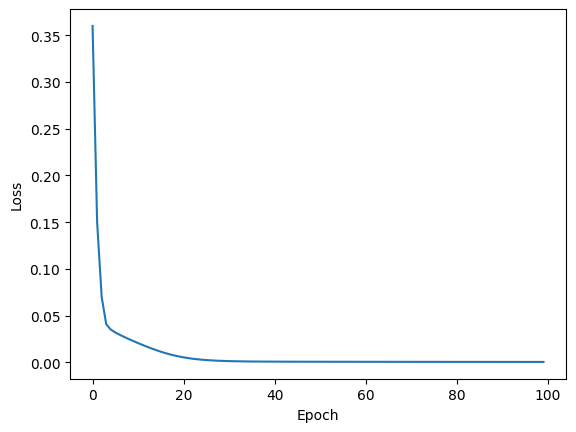

In [ ]:
#Training loss for MLP model 1
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(train_hist_mlp1)

In [ ]:
#Training RMSE for MLP model 1
TrainRMSE = sqrt(mean_squared_error(y_train_origmlp, y_train_pred_origmlp))
print(TrainRMSE)

0.5651023852998517


In [ ]:
#Testing RMSE for MLP model 1
TestRMSE = sqrt(mean_squared_error(y_testmlp, y_test_predmlp))
print(TestRMSE)

2.2420560685292217


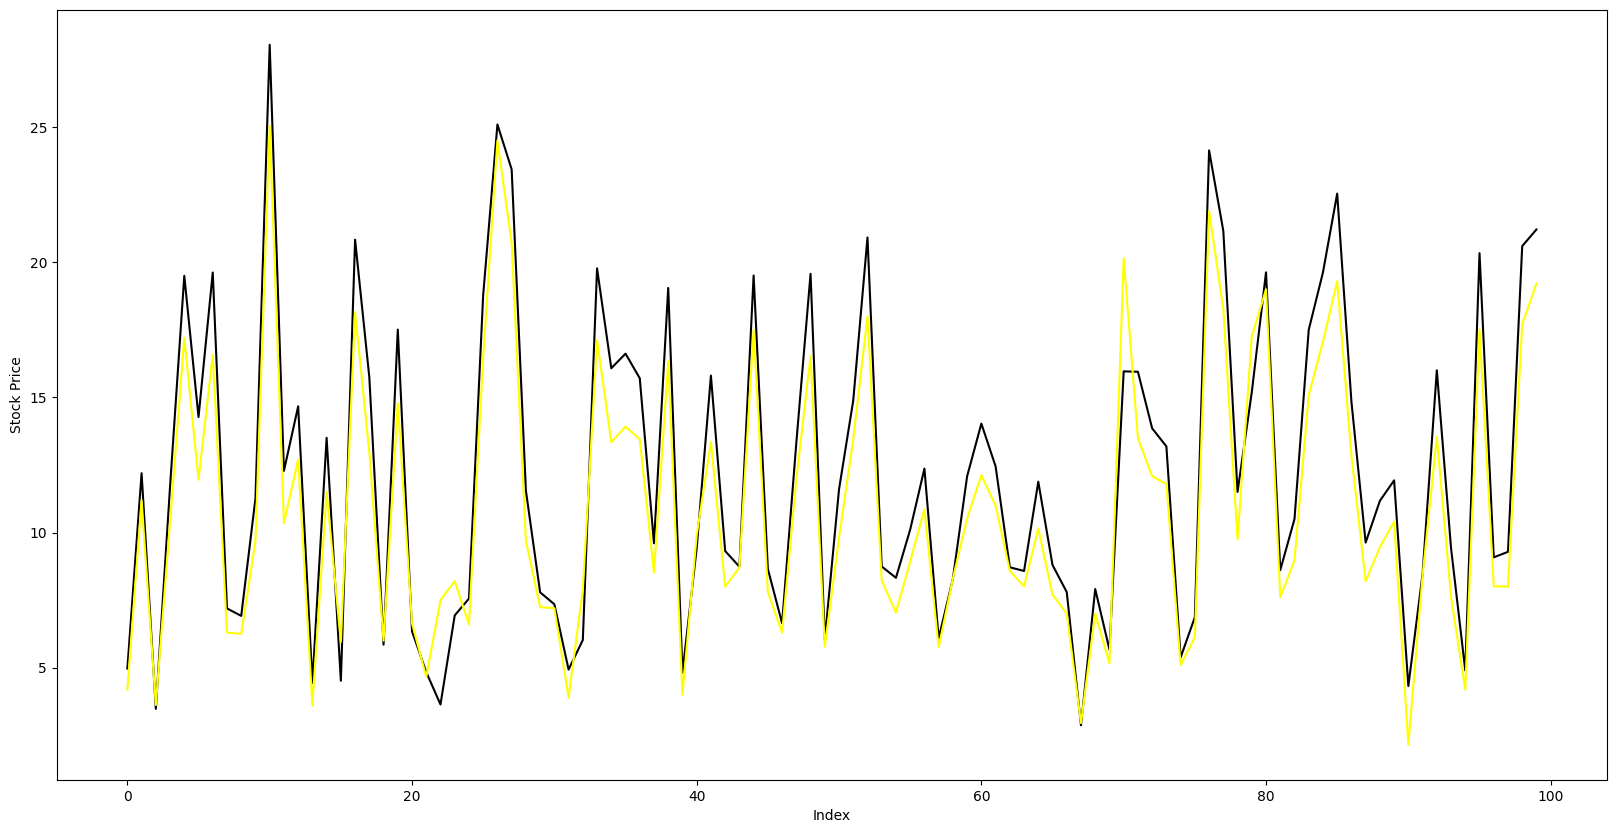

In [ ]:
#Actual vs predicted prices for MLP model 1
plt.figure(figsize = (20,10))
plt.plot(y_test_predmlp[0:100], color = 'black')
plt.plot(y_testmlp[0:100], color = 'yellow')
plt.xlabel('Index')
plt.ylabel('Stock Price');

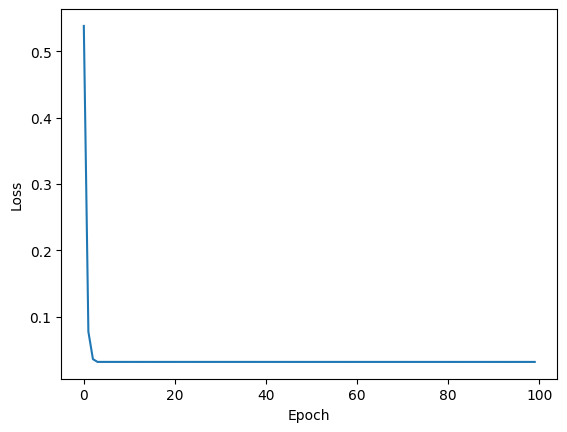

In [ ]:
#Training loss for MLP model 2
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(train_hist_mlp2)

In [ ]:
#Training RMSE for MLP model 2
TrainRMSE = sqrt(mean_squared_error(y_train_origmlp2, y_train_pred_origmlp2))
print(TrainRMSE)

4.403219709602867


In [ ]:
#Testing RMSE for MLP model 2
TestRMSE = sqrt(mean_squared_error(y_test_origmlp2, y_test_predmlp2))
print(TestRMSE)

6.369491291423785


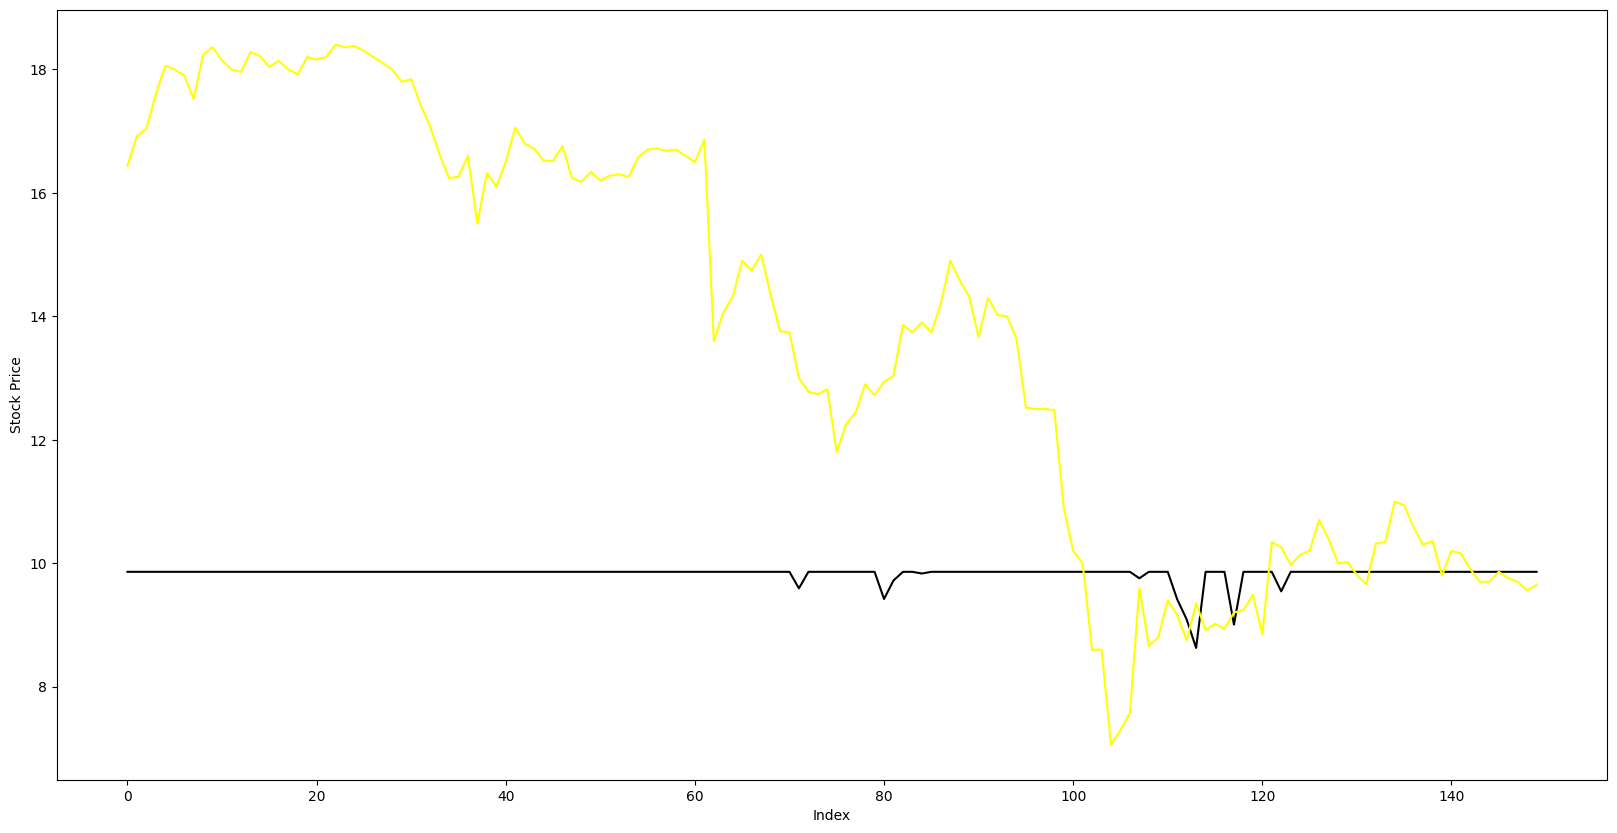

In [ ]:
#Actual vs predicted prices for MLP model 2
plt.figure(figsize = (20,10))
plt.plot(y_test_predmlp2[0:150], color = 'black')
plt.plot(y_test_origmlp2[0:150], color = 'yellow')
plt.xlabel('Index')
plt.ylabel('Stock Price');

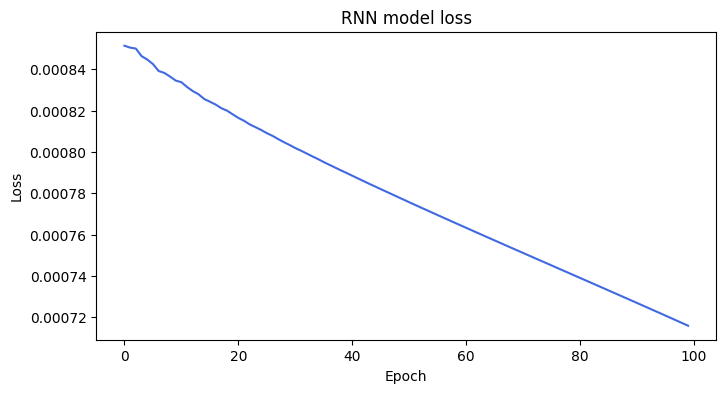

In [ ]:
#Training loss for RNN model
rcParams['figure.figsize'] = 8,4
rnn_loss_fig = sns.lineplot(data = train_hist_rnn, color = 'royalblue')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("RNN model loss")
plt.show(rnn_loss_fig);

In [ ]:

#RNN model performance on testing data
y_test_pred_rnn = rnn_model(X_test)

In [ ]:
#Converting the data back to its original form
rnn_train_pred = scaler.inverse_transform(y_train_pred_rnn.detach().numpy())
rnn_train_orig = scaler.inverse_transform(y_train_rnn.detach().numpy())
rnn_test_pred = scaler.inverse_transform(y_test_pred_rnn.detach().numpy())
rnn_test_orig = scaler.inverse_transform(y_test_rnn.detach().numpy())

In [ ]:
#RNN model RMSE
train_rnn_RMSE = math.sqrt(mean_squared_error(rnn_train_orig[:,0], rnn_train_pred[:,0]))
print('Train RMSE: %.2f' % (train_rnn_RMSE))
test_rnn_RMSE = math.sqrt(mean_squared_error(rnn_test_orig[:,0], rnn_test_pred[:,0]))
print('Test RMSE: %.2f' % (test_rnn_RMSE))

Train RMSE: 0.33
Test RMSE: 0.46


In [ ]:
#Preparing predictions for the plot comparisons for RNN model
rnn_train_data = np.append(rnn_train_orig, rnn_train_pred, axis = 1)
rnn_test_data = np.append(rnn_test_orig, rnn_test_pred, axis = 1)

rnn_train_plot = pd.DataFrame(rnn_train_data)
rnn_train_plot.columns = ['Actual', 'Prediction']
rnn_test_plot = pd.DataFrame(rnn_test_data)
rnn_test_plot.columns = ['Actual', ' Prediction']

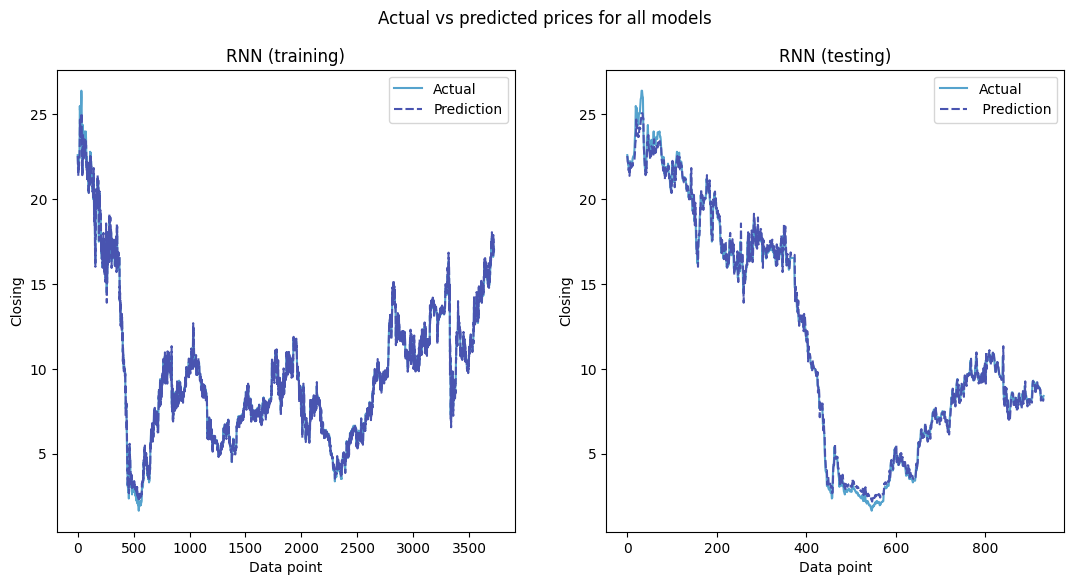

In [ ]:
#Predictions vs actual price for the RNN model
sns.set_palette('icefire')

fig, axes = plt.subplots(1, 2, sharex = False, figsize = (13,6))
fig.suptitle('Actual vs predicted prices for all models')

rnn_training_plot = sns.lineplot(ax = axes[0], data = rnn_train_plot)
rnn_training_plot.set_title('RNN (training)')
rnn_training_plot.set_xlabel('Data point')
rnn_training_plot.set_ylabel('Closing')

rnn_testing_plot = sns.lineplot(ax = axes[1], data = rnn_test_plot)
rnn_testing_plot.set_title('RNN (testing)')
rnn_testing_plot.set_xlabel('Data point')
rnn_testing_plot.set_ylabel('Closing');

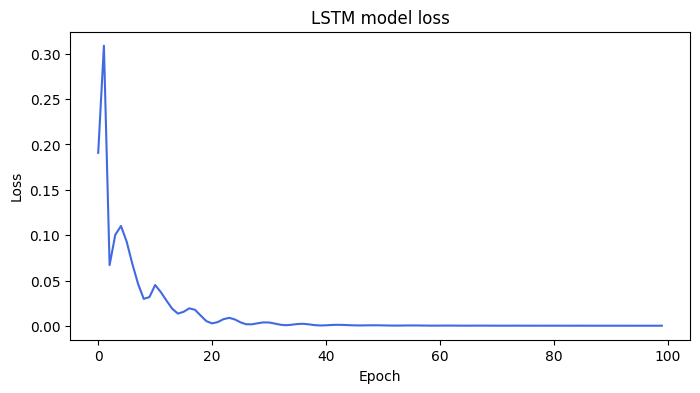

In [ ]:
#Training loss for LSTM model
rcParams['figure.figsize'] = 8,4
lstm_loss_fig = sns.lineplot(data = train_hist_lstm, color = 'royalblue')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LSTM model loss")
plt.show(lstm_loss_fig);

In [ ]:
#LSTM model performance on testing data
y_test_pred_lstm = lstm_model(X_test)

In [ ]:
#Converting the data back to its original form
lstm_train_pred = scaler.inverse_transform(y_train_pred_lstm.detach().numpy())
lstm_train_orig = scaler.inverse_transform(y_train_lstm.detach().numpy())
lstm_test_pred = scaler.inverse_transform(y_test_pred_lstm.detach().numpy())
lstm_test_orig = scaler.inverse_transform(y_test_lstm.detach().numpy())

In [ ]:
#LSTM model RMSE
train_lstm_RMSE = math.sqrt(mean_squared_error(lstm_train_orig[:,0], lstm_train_pred[:,0]))
print('Train RMSE: %.2f' % (train_lstm_RMSE))
test_lstm_RMSE = math.sqrt(mean_squared_error(lstm_test_orig[:,0], lstm_test_pred[:,0]))
print('Test RMSE: %.2f' % (test_lstm_RMSE))

Train RMSE: 0.30
Test RMSE: 0.40


In [ ]:
#Preparing predictions for the plot comparisons
lstm_train_data = np.append(lstm_train_orig, lstm_train_pred, axis = 1)
lstm_test_data = np.append(lstm_test_orig, lstm_test_pred, axis = 1)

lstm_train_plot = pd.DataFrame(lstm_train_data)
lstm_train_plot.columns = ['Actual', 'Prediction']
lstm_test_plot = pd.DataFrame(lstm_test_data)
lstm_test_plot.columns = ['Actual', ' Prediction']

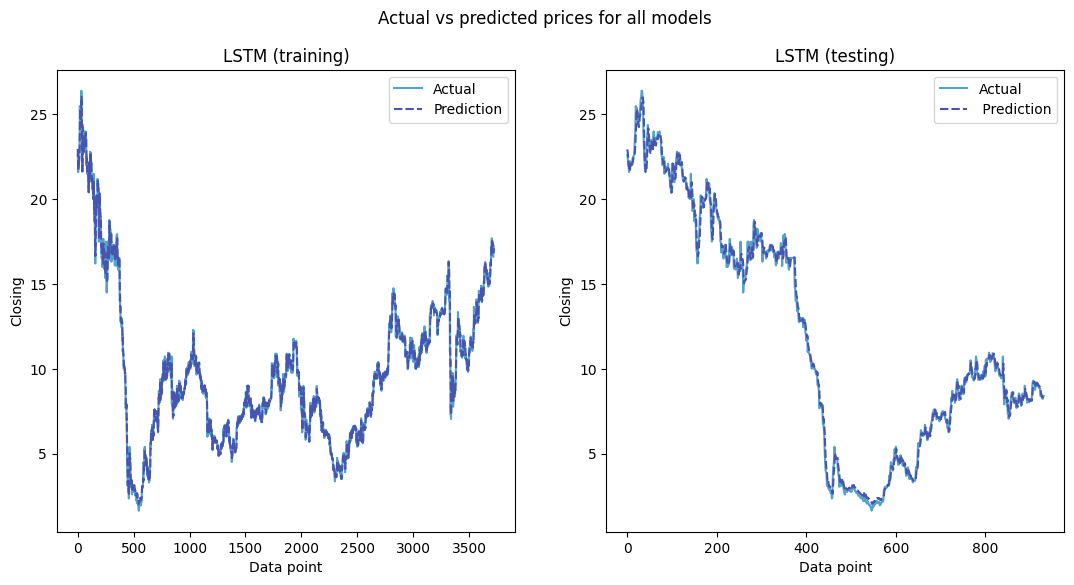

In [ ]:
#Prediction vs actual price for LSTM model
sns.set_palette('icefire')

fig, axes = plt.subplots(1, 2, sharex = False, figsize = (13,6))
fig.suptitle('Actual vs predicted prices for all models')

lstm_training_plot = sns.lineplot(ax = axes[0], data = lstm_train_plot)
lstm_training_plot.set_title('LSTM (training)')
lstm_training_plot.set_xlabel('Data point')
lstm_training_plot.set_ylabel('Closing')

lstm_testing_plot = sns.lineplot(ax = axes[1], data = lstm_test_plot)
lstm_testing_plot.set_title('LSTM (testing)')
lstm_testing_plot.set_xlabel('Data point')
lstm_testing_plot.set_ylabel('Closing');

In [ ]:
#Additional preparation
mlp1_array_plot = np.append(y_test_predmlp[0:100], y_testmlp[0:100], axis = 1)
mlp1_plot_data = pd.DataFrame(mlp1_array_plot)
mlp1_plot_data.columns = ['Prediction', 'Actual']

mlp2_array_plot = np.append(y_test_predmlp2[0:150], y_test_origmlp2[0:150], axis = 1)
mlp2_plot_data = pd.DataFrame(mlp2_array_plot)
mlp2_plot_data.columns = ['Prediction', 'Actual']

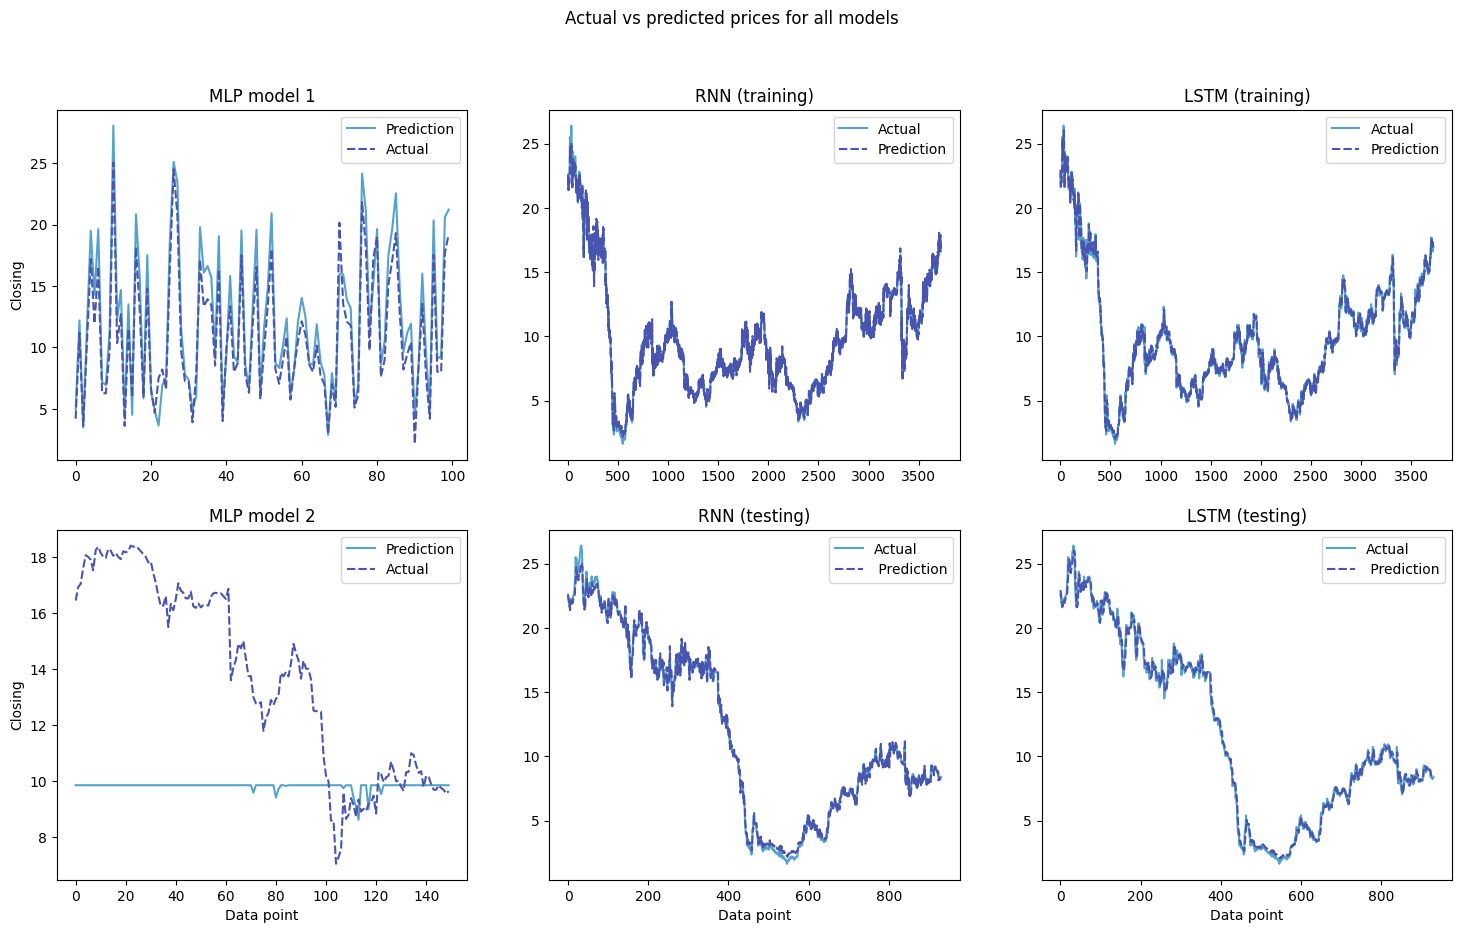

In [ ]:
#All plots next to each other
fig, axes = plt.subplots(2, 3, sharex = False, sharey =  False, figsize = (18,10))
fig.suptitle('Actual vs predicted prices for all models')

mlp1_plot = sns.lineplot(ax = axes[0][0], data = mlp1_plot_data)
mlp1_plot.set_title('MLP model 1')
mlp1_plot.set_ylabel('Closing')

mlp2_plot = sns.lineplot(ax = axes[1][0], data = mlp2_plot_data)
mlp2_plot.set_title('MLP model 2')
mlp2_plot.set_xlabel('Data point')
mlp2_plot.set_ylabel('Closing')

rnn_training_plot = sns.lineplot(ax = axes[0][1], data = rnn_train_plot)
rnn_training_plot.set_title('RNN (training)')

rnn_testing_plot = sns.lineplot(ax = axes[1][1], data = rnn_test_plot)
rnn_testing_plot.set_title('RNN (testing)')
rnn_testing_plot.set_xlabel('Data point')

lstm_training_plot = sns.lineplot(ax = axes[0][2], data = lstm_train_plot)
lstm_training_plot.set_title('LSTM (training)')

lstm_testing_plot = sns.lineplot(ax = axes[1][2], data = lstm_test_plot)
lstm_testing_plot.set_title('LSTM (testing)')
lstm_testing_plot.set_xlabel('Data point');

In [ ]:
# Prepare the input data for the next day's prediction
# Get the last 'window_size - 1' closing prices from the original data
last_sequence = closing_price[-window_size + 1:].values

# Scale the input data using the same scaler used for training
scaled_last_sequence = scaler.transform(last_sequence)

# Reshape the input data to match the LSTM input shape
# The shape should be (1, window_size - 1, 1)
scaled_last_sequence = scaled_last_sequence.reshape(1, window_size - 1, 1)

# Convert the input data to a PyTorch tensor
scaled_last_sequence_tensor = torch.from_numpy(scaled_last_sequence).type(torch.Tensor)

# Set the model to evaluation mode
lstm_model.eval()

# Make the prediction for the next day
with torch.no_grad():
    predicted_scaled_price = lstm_model(scaled_last_sequence_tensor)

# Inverse transform the prediction to get the actual price
predicted_price = scaler.inverse_transform(predicted_scaled_price.detach().numpy())

print(f"Predicted closing price for the next day: {predicted_price[0][0]:.2f}")

Predicted closing price for the next day: 23.18


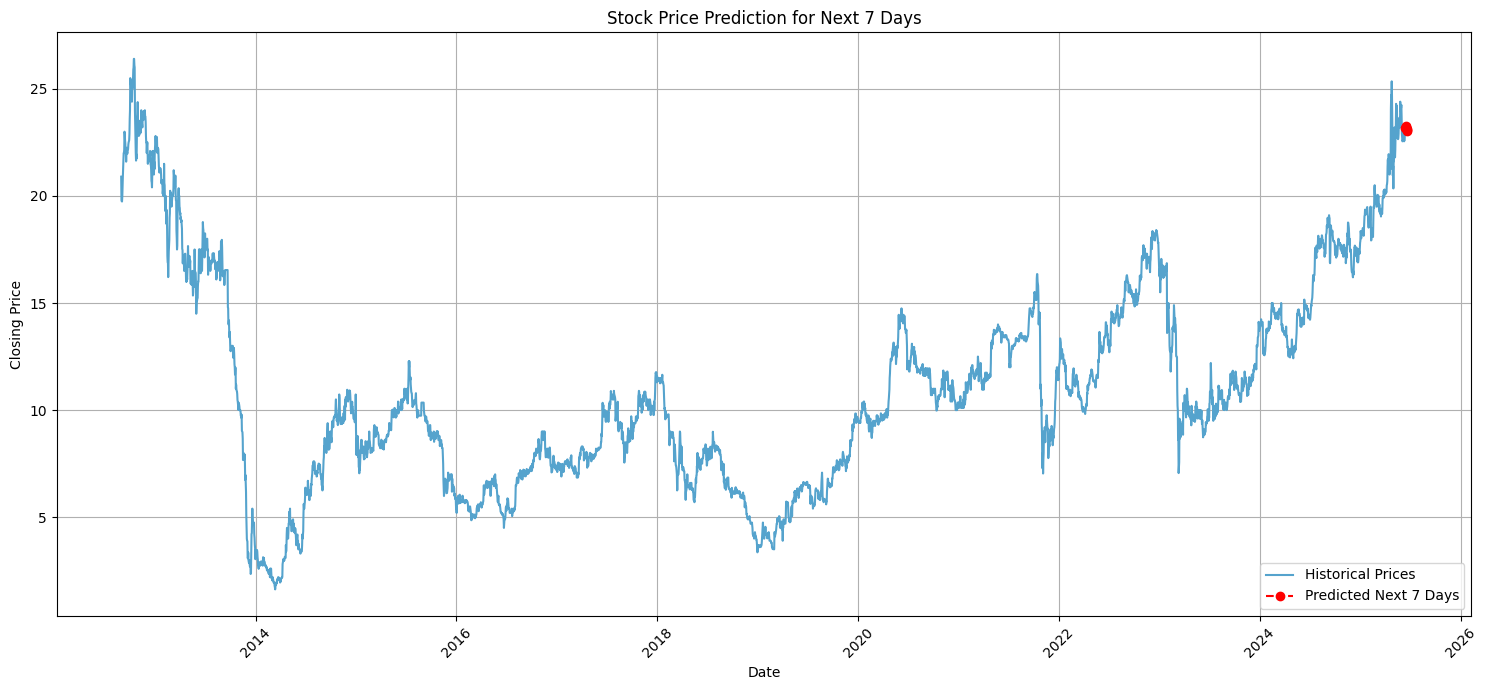


Predicted Closing Prices for the next 7 days:
2025-06-14: 23.18
2025-06-15: 23.27
2025-06-16: 23.23
2025-06-17: 23.18
2025-06-18: 23.13
2025-06-19: 23.08
2025-06-20: 23.04


In [ ]:


# Function to predict next 'n' days
def predict_next_n_days(model, initial_sequence, scaler, n_days):
    predictions = []
    current_sequence = initial_sequence.copy() # Start with the last sequence from the training data

    for _ in range(n_days):
        # Scale the current sequence
        scaled_current_sequence = scaler.transform(current_sequence)

        # Reshape for LSTM input
        scaled_current_sequence_tensor = torch.from_numpy(scaled_current_sequence).type(torch.Tensor).reshape(1, -1, 1)

        # Make the prediction
        with torch.no_grad():
            predicted_scaled_price = model(scaled_current_sequence_tensor)

        # Inverse transform the prediction
        predicted_price = scaler.inverse_transform(predicted_scaled_price.detach().numpy())

        # Store the prediction
        predictions.append(predicted_price[0][0])

        # Update the current sequence by adding the new prediction and removing the oldest value
        current_sequence = np.append(current_sequence[1:], predicted_price, axis=0)

    return predictions

# Get the last 'window_size - 1' closing prices from the original data to start the prediction
initial_sequence_for_prediction = closing_price[-window_size + 1:].values

# Predict the next 7 days using the trained LSTM model
next_7_days_predictions = predict_next_n_days(lstm_model, initial_sequence_for_prediction, scaler, 7)

# Get the dates for the next 7 days
last_date = pd.to_datetime(meta['Data'].iloc[-1])
next_7_days_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

# Plot the original closing prices and the predicted prices for the next 7 days
plt.figure(figsize=(15, 7))
plt.plot(pd.to_datetime(meta['Data']), meta['Close'], label='Historical Prices')
plt.plot(next_7_days_dates, next_7_days_predictions, marker='o', linestyle='--', color='red', label='Predicted Next 7 Days')

plt.title('Stock Price Prediction for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nPredicted Closing Prices for the next 7 days:")
for date, price in zip(next_7_days_dates, next_7_days_predictions):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.2f}")

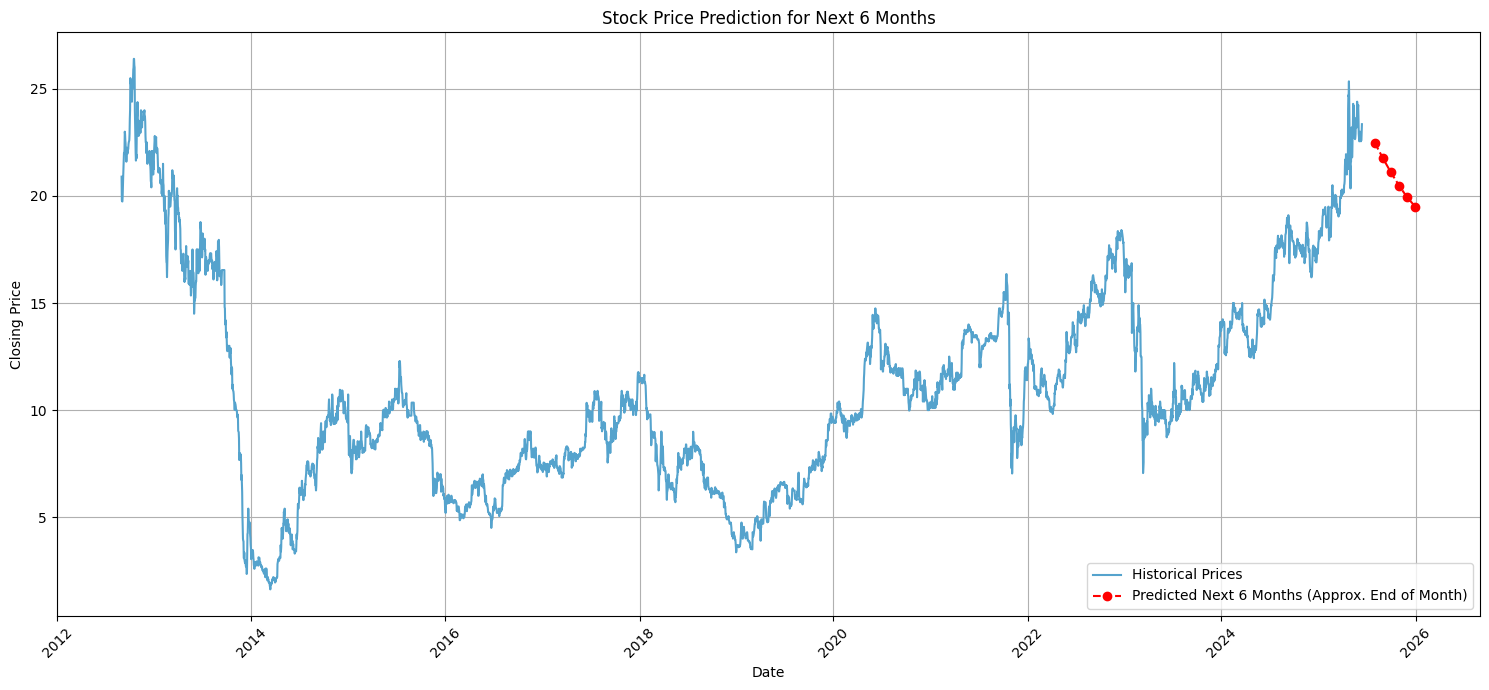


Predicted Closing Prices for the next 6 months (Approx. End of Month):
2025-07: 22.49
2025-08: 21.76
2025-09: 21.10
2025-10: 20.48
2025-11: 19.94
2025-12: 19.50


In [ ]:

# Function to predict next 'n' months
def predict_next_n_months(model, initial_sequence, scaler, n_months, days_per_month=20): # Assume 20 trading days per month
    predictions = []
    current_sequence = initial_sequence.copy()

    for month in range(n_months):
        monthly_predictions = []
        for day in range(days_per_month):
            # Scale the current sequence
            scaled_current_sequence = scaler.transform(current_sequence)

            # Reshape for LSTM input
            scaled_current_sequence_tensor = torch.from_numpy(scaled_current_sequence).type(torch.Tensor).reshape(1, -1, 1)

            # Make the prediction for the next day
            with torch.no_grad():
                predicted_scaled_price = model(scaled_current_sequence_tensor)

            # Inverse transform the prediction
            predicted_price = scaler.inverse_transform(predicted_scaled_price.detach().numpy())

            # Add the prediction to the monthly predictions
            monthly_predictions.append(predicted_price[0][0])

            # Update the current sequence with the new prediction
            current_sequence = np.append(current_sequence[1:], predicted_price, axis=0)

        # Store the average prediction for the month (or the last day's prediction)
        # Here, we take the last day's prediction for simplicity
        predictions.append(monthly_predictions[-1])

    return predictions

# Get the last 'window_size - 1' closing prices from the original data to start the prediction
initial_sequence_for_prediction_months = closing_price[-window_size + 1:].values

# Predict the next 6 months using the trained LSTM model
next_6_months_predictions = predict_next_n_months(lstm_model, initial_sequence_for_prediction_months, scaler, 6)

# Get the dates for the next 6 months
last_date = pd.to_datetime(meta['Data'].iloc[-1])
# We'll approximate the dates for the plot - taking the last day of each future month
next_6_months_dates = pd.date_range(start=last_date, periods=7, freq='M')[1:] # Start from the end of the last historical month + 1 month

# Plot the original closing prices and the predicted prices for the next 6 months
plt.figure(figsize=(15, 7))
plt.plot(pd.to_datetime(meta['Data']), meta['Close'], label='Historical Prices')
plt.plot(next_6_months_dates, next_6_months_predictions, marker='o', linestyle='--', color='red', label='Predicted Next 6 Months (Approx. End of Month)')

plt.title('Stock Price Prediction for Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nPredicted Closing Prices for the next 6 months (Approx. End of Month):")
for date, price in zip(next_6_months_dates, next_6_months_predictions):
    print(f"{date.strftime('%Y-%m')}: {price:.2f}")